# CSC340 (1/2020) - Term Project

## Classification Model (v1)
### This model modified version of pizza or not pizza

# Import Required Dependencies

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# # Utility

# import zipfile
# with zipfile.ZipFile('data.zip', 'r') as zip_ref:
#     zip_ref.extractall('./data/')

In [3]:
# Global Configuration
class_names = ['chevron', 'crosswalk', 'height_limit', 'keep_left', 'no_parking', 'shortcut', 'speed_limit', 'stop']
batch_size = 32
img_height = 180
img_width = 180

# Import Datasets

In [4]:
root_dir = './'

base_dir = os.path.join(root_dir, "data")
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [5]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 574 files belonging to 8 classes.
Using 460 files for training.


In [7]:
# Plotting some of augmented images
# augmented_images = [train_data_gen[0][0][0] for i in range(5)]
# plotImages(augmented_images)

In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 574 files belonging to 8 classes.
Using 114 files for validation.


In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(10).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Training Configuration

In [10]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [11]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

# Build Model

In [12]:
num_classes = 8

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
#   model.summary()

In [15]:
epochs=100

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "model.h5", save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=20)

epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/15
15/15 [==============================] - 2s 134ms/step - loss: 1.9481 - accuracy: 0.2674 - val_loss: 1.6714 - val_accuracy: 0.4211
Epoch 2/15
15/15 [==============================] - 0s 28ms/step - loss: 1.5289 - accuracy: 0.4739 - val_loss: 1.4765 - val_accuracy: 0.6316
Epoch 3/15
15/15 [==============================] - 0s 22ms/step - loss: 1.2064 - accuracy: 0.6043 - val_loss: 1.4790 - val_accuracy: 0.5526
Epoch 4/15
15/15 [==============================] - 0s 28ms/step - loss: 0.9796 - accuracy: 0.6783 - val_loss: 1.2883 - val_accuracy: 0.6140
Epoch 5/15
15/15 [==============================] - 0s 28ms/step - loss: 0.7544 - accuracy: 0.7674 - val_loss: 1.1605 - val_accuracy: 0.7018
Epoch 6/15
15/15 [==============================] - 0s 22ms/step - loss: 0.6392 - accuracy: 0.7935 - val_loss: 1.4824 - val_accuracy: 0.6316
Epoch 7/15
15/15 [==============================] - 0s 22ms/step - loss: 0.4318 - accuracy: 0.8522 - val_loss: 1.4214 - val_accuracy: 0.6491
Epoch 8/15
1

In [16]:
model = tf.keras.models.load_model("model.h5")

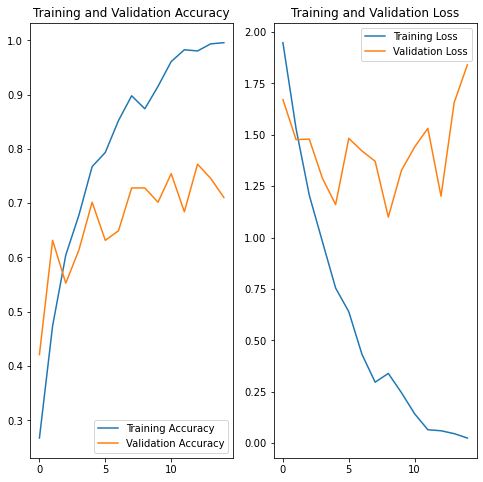

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Make prediction

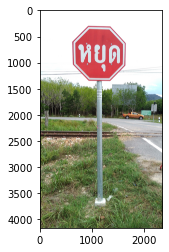

This image most likely belongs to stop with a 0.278577595949173 confidence.


In [19]:
image_url = "https://www.saferoad.co.th/wp-content/uploads/2017/10/SS-LT.jpg"
image_path = tf.keras.utils.get_file('SS-LT.jpg', origin=image_url)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()

img = tf.keras.preprocessing.image.load_img(
    image_path, target_size=(img_width, img_height)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {} confidence."
    .format(class_names[np.argmax(score)],  np.max(score))
)